In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mp
import seaborn as sns
%matplotlib inline

LOADING THE DATA

In [71]:
data = '/content/drive/MyDrive/weatherAUS.csv'

df = pd.read_csv(data)

In [72]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


ROUGH OVERVIEW OF THE ENTIRE DATASET

In [73]:
Weather_data = df.copy()

In [74]:
Weather_data.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


In [75]:
Weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

In [76]:
Weather_data.shape

(145460, 23)

In [77]:
Weather_data.dtypes

,0
Date,object
Location,object
MinTemp,float64
MaxTemp,float64
Rainfall,float64
Evaporation,float64
Sunshine,float64
WindGustDir,object
WindGustSpeed,float64
WindDir9am,object


In [78]:
Weather_data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


CATEGORICAL EDA

In [79]:
Cat_values = Weather_data.select_dtypes(include = ['object'])
Cat_values.head()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,W,W,WNW,No,No
1,2008-12-02,Albury,WNW,NNW,WSW,No,No
2,2008-12-03,Albury,WSW,W,WSW,No,No
3,2008-12-04,Albury,NE,SE,E,No,No
4,2008-12-05,Albury,W,ENE,NW,No,No


In [80]:
Cat_values.isnull().sum()

,0
Date,0
Location,0
WindGustDir,10326
WindDir9am,10566
WindDir3pm,4228
RainToday,3261
RainTomorrow,3267


In [81]:
Cat_values.describe()

,Date,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,135134,134894,141232,142199,142193
unique,3436,49,16,16,16,2,2
top,2013-11-12,Canberra,W,N,SE,No,No
freq,49,3436,9915,11758,10838,110319,110316


In [82]:
Cat_values.nunique()

,0
Date,3436
Location,49
WindGustDir,16
WindDir9am,16
WindDir3pm,16
RainToday,2
RainTomorrow,2


In [83]:
for Value_counts in Cat_values:
  print(Value_counts)
  print(Cat_values[Value_counts].value_counts())

Date
Date
2013-11-12    49
2014-09-01    49
2014-08-23    49
2014-08-24    49
2014-08-25    49
              ..
2007-11-29     1
2007-11-28     1
2007-11-27     1
2007-11-26     1
2008-01-31     1
Name: count, Length: 3436, dtype: int64
Location
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040
Ballarat            3040
Townsville          3040
GoldCoast           3040
Cairns              3040
Launceston          3040
AliceSprings        3040
Bendigo             3040
Albury              3040
MountGinini         3040
Wollongong          3040
Newcastle           3039
Tuggeranong         3039
Penrith             3039
Woomera             3009
Nuriootpa           3009
Cobar               3009
CoffsHarbour        3009
Moree               3009
Sale                3009
PerthAirport        

In [84]:
for Value_counts in Cat_values:
  print(Value_counts, 'Contains', len(Cat_values[Value_counts].unique()), 'labels')

Date Contains 3436 labels
Location Contains 49 labels
WindGustDir Contains 17 labels
WindDir9am Contains 17 labels
WindDir3pm Contains 17 labels
RainToday Contains 3 labels
RainTomorrow Contains 3 labels


In [85]:
def Date_cardinality(dataframe):
  Weather_data['Date'] = pd.to_datetime(Weather_data['Date'])
  Weather_data['Year'] = Weather_data['Date'].dt.year
  Weather_data['Month'] = Weather_data['Date'].dt.month
  Weather_data['Day'] = Weather_data['Date'].dt.day
  Weather_data.drop('Date', axis = 1, inplace = True)
  return dataframe

In [86]:
Weather_data = Date_cardinality(Weather_data)

In [87]:
Weather_data.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Year,Month,Day
0,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,...,1007.1,8.0,NaN,16.9,21.8,No,No,2008,12,1
1,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,...,1007.8,NaN,NaN,17.2,24.3,No,No,2008,12,2
2,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,...,1008.7,NaN,2.0,21.0,23.2,No,No,2008,12,3
3,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,...,1012.8,NaN,NaN,18.1,26.5,No,No,2008,12,4
4,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,...,1006.0,7.0,8.0,17.8,29.7,No,No,2008,12,5


In [88]:
def explore_Cat_values(dataframe, columns):
  for column in columns:
    if column in dataframe.columns:
      print(f"Exploring column: {column}")

      unique_values = dataframe[column].unique()
      # Correct line to get value counts for the current 'column'
      Value_counts = dataframe[column].value_counts()

      print(f"Categorical Column '{column}' contains: {len(unique_values)} unique labels")

      print("Unique values:")
      print(unique_values)
      print("Value counts:")
      print(Value_counts) # Also changed to match variable name
      print("-" * 40)  # Separator for readability
    else:
      print(f"Column '{column}' does not exist in the DataFrame.")
  return dataframe

In [89]:
 Weather_data = explore_Cat_values(Weather_data, Cat_values)

Column 'Date' does not exist in the DataFrame.
Exploring column: Location
Categorical Column 'Location' contains: 49 unique labels
Unique values:
['Albury' 'BadgerysCreek' 'Cobar' 'CoffsHarbour' 'Moree' 'Newcastle'
 'NorahHead' 'NorfolkIsland' 'Penrith' 'Richmond' 'Sydney' 'SydneyAirport'
 'WaggaWagga' 'Williamtown' 'Wollongong' 'Canberra' 'Tuggeranong'
 'MountGinini' 'Ballarat' 'Bendigo' 'Sale' 'MelbourneAirport' 'Melbourne'
 'Mildura' 'Nhil' 'Portland' 'Watsonia' 'Dartmoor' 'Brisbane' 'Cairns'
 'GoldCoast' 'Townsville' 'Adelaide' 'MountGambier' 'Nuriootpa' 'Woomera'
 'Albany' 'Witchcliffe' 'PearceRAAF' 'PerthAirport' 'Perth' 'SalmonGums'
 'Walpole' 'Hobart' 'Launceston' 'AliceSprings' 'Darwin' 'Katherine'
 'Uluru']
Value counts:
Location
Canberra            3436
Sydney              3344
Darwin              3193
Melbourne           3193
Brisbane            3193
Adelaide            3193
Perth               3193
Hobart              3193
Albany              3040
MountGambier        3040


In [90]:
pd.get_dummies(Weather_data.Location, drop_first = True).head()

,Albany,Albury,AliceSprings,BadgerysCreek,Ballarat,Bendigo,Brisbane,Cairns,Canberra,Cobar,...,Townsville,Tuggeranong,Uluru,WaggaWagga,Walpole,Watsonia,Williamtown,Witchcliffe,Wollongong,Woomera
0,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [91]:
Weather_data.WindGustDir.value_counts()

,count
WindGustDir,
W,9915
SE,9418
N,9313
SSE,9216
E,9181
S,9168
WSW,9069
SW,8967
SSW,8736


In [92]:
pd.get_dummies(Weather_data.WindGustDir, drop_first = True, dummy_na = True).head()

,ENE,ESE,N,NE,NNE,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW,NaN
0,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [93]:
pd.get_dummies(df.WindGustDir, drop_first=True, dummy_na=True).sum(axis=0)

,0
ENE,8104
ESE,7372
N,9313
NE,7133
NNE,6548
NNW,6620
NW,8122
S,9168
SE,9418
SSE,9216


In [94]:
Weather_data['WindDir9am'].value_counts()

,count
WindDir9am,
N,11758
SE,9287
E,9176
SSE,9112
NW,8749
S,8659
W,8459
SW,8423
NNE,8129


In [95]:
def one_hot_encoding_cat_values(dataframe, column_name):
  category_counts = dataframe[column_name].value_counts()
  print(f"Category counts for {column_name} are as follows: {category_counts}")
  print("\n")

  one_hot_encoded_data = pd.get_dummies(dataframe[column_name], drop_first = True, dummy_na = True).sum(axis = 0)
  print(f"One-hot encoded data for {column_name} is as follows:")
  print("\n")

  column_sum = one_hot_encoded_data.sum(axis = 0)
  print(f"Sum of each column for {column_name} is as follows:")

  return dataframe

In [96]:
weather_data = one_hot_encoding_cat_values(Weather_data, 'WindDir9am')
Weather_data = one_hot_encoding_cat_values(Weather_data, 'WindDir3pm')

Category counts for WindDir9am are as follows: WindDir9am
N      11758
SE      9287
E       9176
SSE     9112
NW      8749
S       8659
W       8459
SW      8423
NNE     8129
NNW     7980
ENE     7836
NE      7671
ESE     7630
SSW     7587
WNW     7414
WSW     7024
Name: count, dtype: int64


One-hot encoded data for WindDir9am is as follows:


Sum of each column for WindDir9am is as follows:
Category counts for WindDir3pm are as follows: WindDir3pm
SE     10838
W      10110
S       9926
WSW     9518
SSE     9399
SW      9354
N       8890
WNW     8874
NW      8610
ESE     8505
E       8472
NE      8263
SSW     8156
NNW     7870
ENE     7857
NNE     6590
Name: count, dtype: int64


One-hot encoded data for WindDir3pm is as follows:


Sum of each column for WindDir3pm is as follows:


In [97]:
Weather_data.RainToday.value_counts()
Weather_data.RainToday.unique()
pd.get_dummies(Weather_data.RainToday, drop_first = True).head()
pd.get_dummies(df.RainToday, drop_first=True, dummy_na=True).sum(axis=0)

,0
Yes,31880
NaN,3261


NUMERICAL COLUMNS EDA

In [98]:
num_values = Weather_data.select_dtypes(include = ['int64', 'float64'])
num_values.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,NaN,NaN,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,NaN,NaN,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,NaN,NaN,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,NaN,NaN,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,NaN,NaN,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7


In [99]:
num_values.isnull().sum()

,0
MinTemp,1485
MaxTemp,1261
Rainfall,3261
Evaporation,62790
Sunshine,69835
WindGustSpeed,10263
WindSpeed9am,1767
WindSpeed3pm,3062
Humidity9am,2654
Humidity3pm,4507


In [100]:
num_values.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


In [101]:
num_values.nunique()

,0
MinTemp,389
MaxTemp,505
Rainfall,681
Evaporation,358
Sunshine,145
WindGustSpeed,67
WindSpeed9am,43
WindSpeed3pm,44
Humidity9am,101
Humidity3pm,101


In [102]:
num_values.shape

(145460, 16)

In [103]:
num_values.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 16 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   MinTemp        143975 non-null  float64
 1   MaxTemp        144199 non-null  float64
 2   Rainfall       142199 non-null  float64
 3   Evaporation    82670 non-null   float64
 4   Sunshine       75625 non-null   float64
 5   WindGustSpeed  135197 non-null  float64
 6   WindSpeed9am   143693 non-null  float64
 7   WindSpeed3pm   142398 non-null  float64
 8   Humidity9am    142806 non-null  float64
 9   Humidity3pm    140953 non-null  float64
 10  Pressure9am    130395 non-null  float64
 11  Pressure3pm    130432 non-null  float64
 12  Cloud9am       89572 non-null   float64
 13  Cloud3pm       86102 non-null   float64
 14  Temp9am        143693 non-null  float64
 15  Temp3pm        141851 non-null  float64
dtypes: float64(16)
memory usage: 17.8 MB


In [104]:
num_values.columns

Index(['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm',
       'Temp9am', 'Temp3pm'],
      dtype='object')

In [105]:
def visualization_num_values(dataframe, columns):
  plt.figure(figsize = (20,18))
  sns.boxplot(data = dataframe[columns])
  sns.histplot(data = dataframe[columns])
  plt.xticks(rotation = 90)
  plt.show()

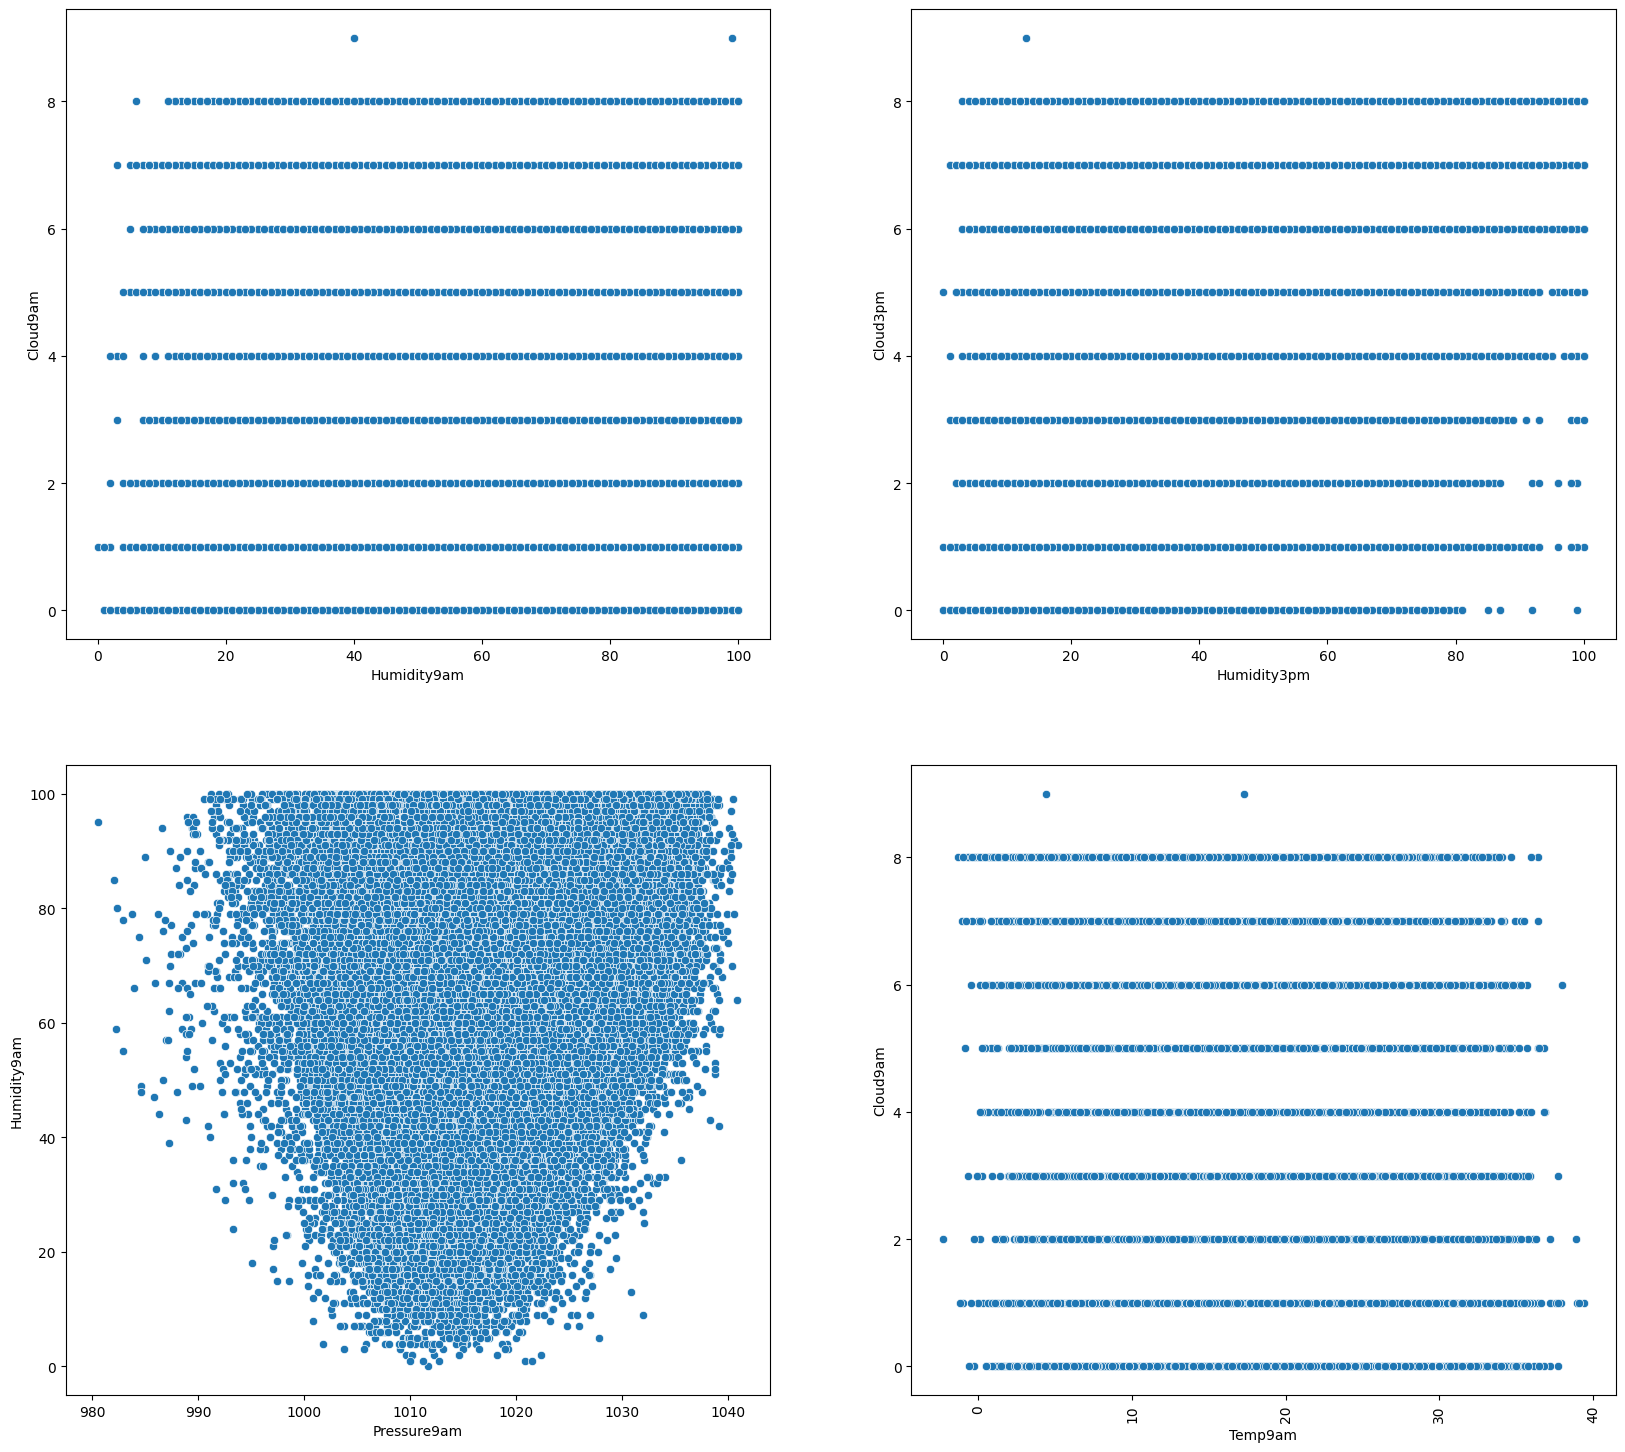

In [106]:

  plt.figure(figsize = (20,18))
  plt.subplot(2,2,1)
  sns.scatterplot( data = Weather_data, x = 'Humidity9am', y = 'Cloud9am')
  plt.subplot(2,2,2)
  sns.scatterplot( data = Weather_data, x = 'Humidity3pm', y = 'Cloud3pm')
  plt.subplot(2,2,3)
  sns.scatterplot( data = Weather_data, x = 'Pressure9am', y = 'Humidity9am')
  plt.subplot(2,2,4)
  sns.scatterplot( data = Weather_data, x = 'Temp9am', y = 'Cloud9am')
  plt.xticks( rotation = 90)
  plt.show()

OUTLIER DETECTION ON THE NUMERICAL COLUMNS

In [107]:
def Outliers_detection(dataframe):
    # Initialize dictionaries to store outlier fences
    fences = {}

    # Iterate over each numeric column
    for col in dataframe.select_dtypes(include=['int64', 'float64']).columns:
        # Calculate IQR for each column
        IRQ = dataframe[col].quantile(0.75) - dataframe[col].quantile(0.25)
        Lower_fence = dataframe[col].quantile(0.25) - (3 * IRQ)
        Upper_fence = dataframe[col].quantile(0.75) + (3 * IRQ)

        # Store results in the dictionary
        fences[col] = {'Lower_fence': Lower_fence, 'Upper_fence': Upper_fence}

        # Print the outlier boundaries for each column
        print('{col} outliers are values < {lowerboundary} or > {upperboundary}'.format(
            col=col,
            lowerboundary=Lower_fence,
            upperboundary=Upper_fence
        ))

    return fences


In [108]:
Outliers_detection(Weather_data)


MinTemp outliers are values < -20.299999999999997 or > 44.8
MaxTemp outliers are values < -13.000000000000004 or > 59.1
Rainfall outliers are values < -2.4000000000000004 or > 3.2
Evaporation outliers are values < -11.800000000000002 or > 21.800000000000004
Sunshine outliers are values < -12.599999999999998 or > 28.0
WindGustSpeed outliers are values < -20.0 or > 99.0
WindSpeed9am outliers are values < -29.0 or > 55.0
WindSpeed3pm outliers are values < -20.0 or > 57.0
Humidity9am outliers are values < -21.0 or > 161.0
Humidity3pm outliers are values < -50.0 or > 153.0
Pressure9am outliers are values < 984.4 or > 1050.9
Pressure3pm outliers are values < 981.5999999999999 or > 1048.8000000000002
Cloud9am outliers are values < -17.0 or > 25.0
Cloud3pm outliers are values < -13.0 or > 22.0
Temp9am outliers are values < -15.600000000000001 or > 49.5
Temp3pm outliers are values < -12.79999999999999 or > 55.79999999999999


{'MinTemp': {'Lower_fence': -20.299999999999997, 'Upper_fence': 44.8},
 'MaxTemp': {'Lower_fence': -13.000000000000004, 'Upper_fence': 59.1},
 'Rainfall': {'Lower_fence': -2.4000000000000004, 'Upper_fence': 3.2},
 'Evaporation': {'Lower_fence': -11.800000000000002,
  'Upper_fence': 21.800000000000004},
 'Sunshine': {'Lower_fence': -12.599999999999998, 'Upper_fence': 28.0},
 'WindGustSpeed': {'Lower_fence': -20.0, 'Upper_fence': 99.0},
 'WindSpeed9am': {'Lower_fence': -29.0, 'Upper_fence': 55.0},
 'WindSpeed3pm': {'Lower_fence': -20.0, 'Upper_fence': 57.0},
 'Humidity9am': {'Lower_fence': -21.0, 'Upper_fence': 161.0},
 'Humidity3pm': {'Lower_fence': -50.0, 'Upper_fence': 153.0},
 'Pressure9am': {'Lower_fence': 984.4, 'Upper_fence': 1050.9},
 'Pressure3pm': {'Lower_fence': 981.5999999999999,
  'Upper_fence': 1048.8000000000002},
 'Cloud9am': {'Lower_fence': -17.0, 'Upper_fence': 25.0},
 'Cloud3pm': {'Lower_fence': -13.0, 'Upper_fence': 22.0},
 'Temp9am': {'Lower_fence': -15.6000000000000

In [109]:
X = Weather_data.drop('RainTomorrow', axis = 1)
y = Weather_data['RainTomorrow']

SPLITTING THE DATA TO PERFORM FEATURE ENGINEERING

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0, test_size = 0.2)

In [111]:
X_train.shape, X_test.shape

((116368, 24), (29092, 24))

In [112]:

y_train = y_train.fillna(y_train.mode()[0])


y_test = y_test.fillna(y_test.mode()[0])

In [113]:
y_train.isnull().sum(), y_test.isnull().sum()

(0, 0)

EDA FOR THE SPLITS IN TERMS OF CATEGORICAL AND NUMERICAL COLUMNS IN THE X_TRAIN

In [114]:
Categorical = X_train.select_dtypes(include = ['object'])
Categorical.head(3),Categorical.isnull().sum() ,Categorical.columns

(             Location WindGustDir WindDir9am WindDir3pm RainToday
 22926   NorfolkIsland         ESE        ESE        ESE        No
 80735        Watsonia          NE        NNW        NNE        No
 121764          Perth          SW        NaN         SW       Yes,
 Location          0
 WindGustDir    8270
 WindDir9am     8448
 WindDir3pm     3369
 RainToday      2617
 dtype: int64,
 Index(['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday'], dtype='object'))

In [115]:
numerical = X_train.select_dtypes(include = ['int64', 'float64'])
numerical.head(3),numerical.isnull().sum() ,numerical.columns

(        MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
 22926      18.8     23.7       0.2          5.0       7.3           52.0   
 80735       9.3     24.0       0.2          1.6      10.9           48.0   
 121764     10.9     22.2       1.4          1.2       9.6           26.0   
 
         WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
 22926           31.0          28.0         74.0         73.0       1016.6   
 80735           13.0          24.0         74.0         55.0       1018.3   
 121764           0.0          11.0         85.0         47.0       1017.6   
 
         Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  
 22926        1013.9       5.0       7.0     21.4     22.2  
 80735        1014.6       3.0       5.0     14.3     23.2  
 121764       1014.9       1.0       2.0     16.6     21.5  ,
 MinTemp           1183
 MaxTemp           1019
 Rainfall          2617
 Evaporation      50355
 Sunshine         55899
 WindGustSp

FEATURE ENGINEERING

In [116]:
for df in [X_train, X_test]:
    for col in numerical:
        col_median = df[col].median()  # Calculate median for each DataFrame
        df[col].fillna(col_median, inplace=True)

# Handle categorical features separately for X_train and X_test
for col in ['WindGustDir', 'WindDir9am', 'WindDir3pm','RainToday']:
    X_train[col].fillna(X_train[col].mode()[0], inplace=True)
    X_test[col].fillna(X_test[col].mode()[0], inplace=True)  # Use mode of X_test

In [117]:
X_train.isnull().sum(), X_test.isnull().sum()

(Location         0
 MinTemp          0
 MaxTemp          0
 Rainfall         0
 Evaporation      0
 Sunshine         0
 WindGustDir      0
 WindGustSpeed    0
 WindDir9am       0
 WindDir3pm       0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Cloud9am         0
 Cloud3pm         0
 Temp9am          0
 Temp3pm          0
 RainToday        0
 Year             0
 Month            0
 Day              0
 dtype: int64,
 Location         0
 MinTemp          0
 MaxTemp          0
 Rainfall         0
 Evaporation      0
 Sunshine         0
 WindGustDir      0
 WindGustSpeed    0
 WindDir9am       0
 WindDir3pm       0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Cloud9am         0
 Cloud3pm         0
 Temp9am          0
 Temp3pm          0
 RainToday        0
 Year             0
 Month            0
 Day              0
 dtype: int64)

OUTLIER HANDLING

In [118]:
def max_value(df3, variable, top):
    return np.where(df3[variable]>top, top, df3[variable])

for df3 in [X_train, X_test]:
    df3['Rainfall'] = max_value(df3, 'Rainfall', 3.2)
    df3['Evaporation'] = max_value(df3, 'Evaporation', 21.8)
    df3['WindSpeed9am'] = max_value(df3, 'WindSpeed9am', 55)
    df3['WindSpeed3pm'] = max_value(df3, 'WindSpeed3pm', 57)

In [119]:
X_train.Rainfall.max(), X_test.Rainfall.max()

(3.2, 3.2)

In [120]:
X_train.Evaporation.max(), X_test.Evaporation.max()

(21.8, 21.8)

In [121]:
X_train.WindSpeed9am.max(), X_test.WindSpeed9am.max()

(55.0, 55.0)

In [122]:
X_train.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Year,Month,Day
count,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000,116368.000000
mean,12.190189,23.203107,0.670800,5.093362,7.982476,39.982091,14.029381,18.687466,68.950691,51.605828,1017.639891,1015.244946,4.664092,4.710728,16.979454,21.657195,2012.767058,6.395091,15.731954
std,6.366893,7.085408,1.181512,2.800200,2.761639,13.127953,8.835596,8.700618,18.811437,20.439999,6.728234,6.661517,2.280687,2.106040,6.449641,6.848293,2.538401,3.425451,8.796931
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.500000,977.100000,0.000000,0.000000,-7.200000,-5.400000,2007.000000,1.000000,1.000000
25%,7.700000,18.000000,0.000000,4.000000,8.200000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,3.000000,4.000000,12.300000,16.700000,2011.000000,3.000000,8.000000
50%,12.000000,22.600000,0.000000,4.700000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000,2013.000000,6.000000,16.000000
75%,16.800000,28.200000,0.600000,5.200000,8.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,6.000000,6.000000,21.500000,26.200000,2015.000000,9.000000,23.000000
max,31.900000,48.100000,3.200000,21.800000,14.500000,135.000000,55.000000,57.000000,100.000000,100.000000,1041.000000,1039.600000,9.000000,8.000000,40.200000,46.700000,2017.000000,12.000000,31.000000


ENCODING THE CATEGORICAL COLUMNS

In [123]:
pip install category_encoders

In [124]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['RainToday'])

X_train = encoder.fit_transform(X_train)
X_test = encoder.transform(X_test)

In [125]:
X_train.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
22926,NorfolkIsland,18.8,23.7,0.2,5.0,7.3,ESE,52.0,ESE,ESE,...,1013.9,5.0,7.0,21.4,22.2,0,1,2014,3,12
80735,Watsonia,9.3,24.0,0.2,1.6,10.9,NE,48.0,NNW,NNE,...,1014.6,3.0,5.0,14.3,23.2,0,1,2016,10,6
121764,Perth,10.9,22.2,1.4,1.2,9.6,SW,26.0,N,SW,...,1014.9,1.0,2.0,16.6,21.5,1,0,2011,8,31
139821,Darwin,19.3,29.9,0.0,9.2,11.0,ESE,43.0,ESE,E,...,1012.1,1.0,1.0,23.2,29.1,0,1,2010,6,11
1867,Albury,15.7,17.6,3.2,4.7,8.4,E,20.0,ESE,E,...,1010.5,8.0,8.0,16.5,17.3,1,0,2014,4,10


In [126]:
X_test.head()

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday_0,RainToday_1,Year,Month,Day
138175,AliceSprings,21.9,39.4,1.6,11.2,11.5,NNW,57.0,NE,N,...,1004.1,2.0,6.0,29.8,35.4,1,0,2014,12,3
38638,WaggaWagga,20.5,37.5,0.0,9.2,8.4,WNW,59.0,ENE,N,...,1006.5,4.0,7.0,27.3,35.7,0,1,2015,1,8
124058,SalmonGums,5.1,17.2,0.2,4.8,8.5,W,50.0,WNW,W,...,1015.3,5.0,5.0,10.1,16.1,0,1,2009,8,16
99214,Adelaide,11.9,16.8,1.0,4.8,8.5,SW,28.0,WNW,SW,...,1017.7,5.0,5.0,14.3,15.2,0,1,2016,8,31
25097,Penrith,7.5,21.3,0.0,4.8,8.5,NE,15.0,SW,NNE,...,1015.3,5.0,5.0,13.7,21.1,0,1,2011,8,28


In [127]:
X_train.isnull().sum(), X_test.isnull().sum()


(Location         0
 MinTemp          0
 MaxTemp          0
 Rainfall         0
 Evaporation      0
 Sunshine         0
 WindGustDir      0
 WindGustSpeed    0
 WindDir9am       0
 WindDir3pm       0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Cloud9am         0
 Cloud3pm         0
 Temp9am          0
 Temp3pm          0
 RainToday_0      0
 RainToday_1      0
 Year             0
 Month            0
 Day              0
 dtype: int64,
 Location         0
 MinTemp          0
 MaxTemp          0
 Rainfall         0
 Evaporation      0
 Sunshine         0
 WindGustDir      0
 WindGustSpeed    0
 WindDir9am       0
 WindDir3pm       0
 WindSpeed9am     0
 WindSpeed3pm     0
 Humidity9am      0
 Humidity3pm      0
 Pressure9am      0
 Pressure3pm      0
 Cloud9am         0
 Cloud3pm         0
 Temp9am          0
 Temp3pm          0
 RainToday_0      0
 RainToday_1      0
 Year             0
 Month            0
 Day 

CREATING THE X_TRAIN TRAINING SET FROM THE RAIN TODAY VARIABLE GOTTEN FROM FEATURE ENGINEERING



In [128]:
X_train = pd.concat([X_train[numerical.columns], X_train[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_train.Location),
                     pd.get_dummies(X_train.WindGustDir),
                     pd.get_dummies(X_train.WindDir9am),
                     pd.get_dummies(X_train.WindDir3pm)], axis=1)

In [129]:
X_train.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
22926,18.8,23.7,0.2,5.0,7.3,52.0,31.0,28.0,74.0,73.0,...,False,False,False,False,False,False,False,False,False,False
80735,9.3,24.0,0.2,1.6,10.9,48.0,13.0,24.0,74.0,55.0,...,False,False,False,False,False,False,False,False,False,False
121764,10.9,22.2,1.4,1.2,9.6,26.0,0.0,11.0,85.0,47.0,...,False,False,False,False,False,False,True,False,False,False
139821,19.3,29.9,0.0,9.2,11.0,43.0,26.0,17.0,44.0,37.0,...,False,False,False,False,False,False,False,False,False,False
1867,15.7,17.6,3.2,4.7,8.4,20.0,11.0,13.0,100.0,100.0,...,False,False,False,False,False,False,False,False,False,False


In [130]:
X_test = pd.concat([X_test[numerical.columns], X_test[['RainToday_0', 'RainToday_1']],
                     pd.get_dummies(X_test.Location),
                     pd.get_dummies(X_test.WindGustDir),
                     pd.get_dummies(X_test.WindDir9am),
                     pd.get_dummies(X_test.WindDir3pm)], axis=1)

In [131]:
X_test.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,...,NNW,NW,S,SE,SSE,SSW,SW,W,WNW,WSW
138175,21.9,39.4,1.6,11.2,11.5,57.0,20.0,33.0,50.0,26.0,...,False,False,False,False,False,False,False,False,False,False
38638,20.5,37.5,0.0,9.2,8.4,59.0,17.0,20.0,47.0,22.0,...,False,False,False,False,False,False,False,False,False,False
124058,5.1,17.2,0.2,4.8,8.5,50.0,28.0,22.0,68.0,51.0,...,False,False,False,False,False,False,False,True,False,False
99214,11.9,16.8,1.0,4.8,8.5,28.0,11.0,13.0,80.0,79.0,...,False,False,False,False,False,False,True,False,False,False
25097,7.5,21.3,0.0,4.8,8.5,15.0,2.0,7.0,88.0,52.0,...,False,False,False,False,False,False,False,False,False,False


In [132]:
cols = X_train.columns
#

SCALING THE DATA TO MAKE THE MODEL HAVE AN EASIER TIME DURING MODELLING

In [133]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

MODELLING AND MODEL TRAINING

In [134]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

logreg = LogisticRegression(solver = 'liblinear', random_state = 0, C = 1.0)
logreg.fit(X_train, y_train)

LogisticRegression(random_state=0, solver='liblinear')

MODEL PREDICTION

In [135]:
y_pred = logreg.predict(X_test)

PERFORMANCE METRICS

In [136]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.8485838031073835


Confusion Matrix:
[[21557  1169]
 [ 3236  3130]]


Text(0.5, 1.0, 'CONFUSION MATRIX')

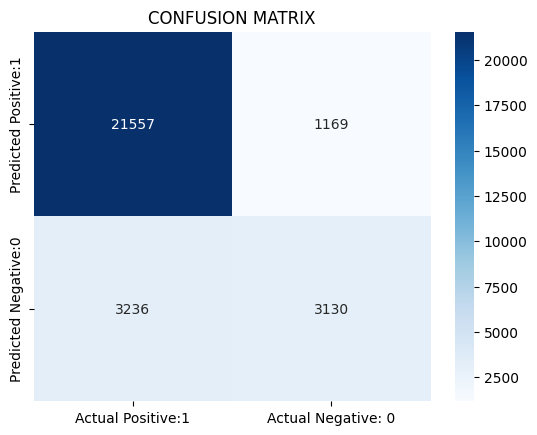

In [144]:
from sklearn.metrics import confusion_matrix
confusion_mat = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(confusion_mat)


confusion_mat= pd.DataFrame(data = confusion_mat, columns = ['Actual Positive:1', 'Actual Negative: 0'], index = ['Predicted Positive:1', 'Predicted Negative:0'])
sns.heatmap(confusion_mat, annot=True, fmt='d', cmap='Blues')
plt.title('CONFUSION MATRIX')